In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
 


In [4]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
dataset, dataset_info = tfds.load('mnist', as_supervised = True, with_info = True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.



Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


In [6]:
# Check that dataset is a dictionary
print('dataset has type:', type(dataset))

# Print the keys of the dataset dictionary
print('\nThe keys of dataset are:', list(dataset.keys()))

dataset has type: <class 'dict'>

The keys of dataset are: ['test', 'train']


In [7]:
training_set, test_set = dataset['train'], dataset['test']

In [8]:
dataset_info


tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

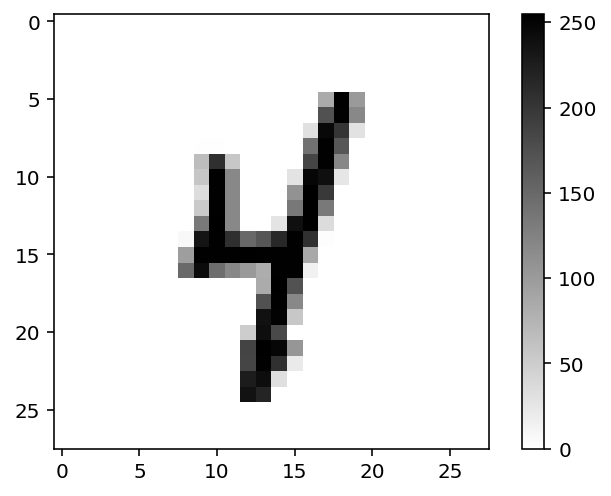

The label of this image is: 4


In [9]:
for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()
    
# Plot the image
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.show()

print('The label of this image is:', label)

In [10]:
dataset_info.features['image']

Image(shape=(28, 28, 1), dtype=tf.uint8)

In [11]:
dataset_info.features['label']

ClassLabel(shape=(), dtype=tf.int64, num_classes=10)

In [12]:
dataset_info.splits['train']


<tfds.core.SplitInfo num_examples=60000>

In [13]:
shape_images = dataset_info.features['image'].shape
num_classes = dataset_info.features['label'].num_classes

num_training_examples  = dataset_info.splits['train'].num_examples
num_test_examples = dataset_info.splits['test'].num_examples

print('There are {:,} classes in our dataset'.format(num_classes))
print('The images in our dataset have shape:', shape_images)

print('\nThere are {:,} images in the test set'.format(num_test_examples))
print('There are {:,} images in the training set'.format(num_training_examples))

There are 10 classes in our dataset
The images in our dataset have shape: (28, 28, 1)

There are 10,000 images in the test set
There are 60,000 images in the training set


In [14]:
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label

batch_size = 64

training_batches = training_set.cache().shuffle(num_training_examples//4).batch(batch_size).map(normalize).prefetch(1)
testing_batches = test_set.cache().batch(batch_size).map(normalize).prefetch(1)



In [15]:
## Solution
my_model = tf.keras.Sequential([
           tf.keras.layers.Flatten(input_shape=(28,28,1)),
           tf.keras.layers.Dense(256, activation = 'relu'),
           tf.keras.layers.Dense(128, activation = 'relu'),
           tf.keras.layers.Dense(64, activation = 'relu'),
           tf.keras.layers.Dense(10, activation = 'softmax')
])

In [16]:
## Solution
my_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

EPOCHS = 5

history = my_model.fit(training_batches, epochs = EPOCHS)

Epoch 1/5
938/938 [==============================] - 10s 11ms/step - loss: 0.2335 - accuracy: 0.9315
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0929 - accuracy: 0.9720
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0626 - accuracy: 0.9801
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0479 - accuracy: 0.9844
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0393 - accuracy: 0.9872
